# A Proof of the Collatz Conjecture

In [1]:
import numpy as np
from fractions import Fraction

## Summary
An infinite, exponentially expanding rational-valued binary choice lattice is constructed that has a 1:1 relationship with Collatz chains when lattice nodes are integers.  This lattice by design includes all Collatz solutions and all paths to integers in the lattice can be reversed as Collatz chain solutions for that integer.  

This lattice gives a cycle-free structure on which to reason about the Collatz conjecture and allows us to extend the work of Alves, Graça et al to 8 mod 18 integers by contradiction $\ ^{[Alves, Graça]}$.



## Matrix Forms
We start by expressing the Shortcut form of the Collatz Conjecture as an infinite set of matrices.  This matrix approach embraces the 1,2,1 cycle which we find falls out of the $X[-3] == X[-1] requirement without having to impose these values directly.  These matrices are not related to the matrices from the Alves, Graça  paper.

### Generation 0
The generation 0 matrix captures the last three steps of all Collatz chains:  
$$
\begin{matrix}
x_2 & = & \frac{3x_1 + 1}{2} & \  \\
x_1 & = & \frac{x_0}{2} & \  \\
x_0 & = & x_2 & \textit{imposing this cycle results in 1,2,1 we do not have to force 1,2,1} \\
\end{matrix}
$$

The generation 0 matrix is:

$$
\begin{bmatrix} 
    -3 & 2 & 0 \\
    0 & -1 & 2 \\ 
    -1 & 0 & 1 
\end{bmatrix}
X
=
\begin{bmatrix} 
    1 \\
    0 \\ 
    0 
\end{bmatrix}
$$

$$\implies$$

$$
X
=
\begin{bmatrix} 
    1 \\
    2 \\ 
    1 
\end{bmatrix}
$$

In [2]:
A = np.array([
    [-3,2,0],
    [0,-1,2],
    [-1,0, 1],
])
b = np.array([1,0,0])
x = np.linalg.solve(A,b)
x

array([1., 2., 1.])

### Generation 1

We generate 2 matrices, keeping the Generation 0 equations as a kernel and we add two different rows above it, one for each of the $\frac{3o+1}{2}$ and $\frac{e}{2}$ cases

$$
\begin{bmatrix} 
    -1 & 2 & 0 & 0\\
    0 & \textbf{-3} & \textbf{2} & \textbf{0}\\ 
    0 & \textbf{0} & \textbf{-1} & \textbf{2}\\
    0 & \textbf{-1} & \textbf{0} & \textbf{1} 
\end{bmatrix}
X
=
\begin{bmatrix} 
    0 \\
    \textbf{1} \\ 
    \textbf{0} \\ 
    \textbf{0} 
\end{bmatrix}
$$

$$\implies$$

$$
X
=
\begin{bmatrix} 
    2 \\
    \textbf{1} \\ 
    \textbf{2} \\ 
    \textbf{1}
\end{bmatrix}
$$

$$
\begin{bmatrix} 
    -3 & 2 & 0 & 0\\
    0 & \textbf{-3} & \textbf{2} & \textbf{0}\\ 
    0 & \textbf{0} & \textbf{-1} & \textbf{2}\\
    0 & \textbf{-1} & \textbf{0} & \textbf{1} 
\end{bmatrix}
X
=
\begin{bmatrix} 
    1 \\
    \textbf{1} \\ 
    \textbf{0} \\ 
    \textbf{0} 
\end{bmatrix}
$$

$$\implies$$

$$
X
=
\begin{bmatrix} 
    \frac{1}{3} \\
    \textbf{1} \\
    \textbf{2} \\ 
    \textbf{1} \\ 
\end{bmatrix}
$$


In [3]:
A = np.array([
    [-1,2,0,0],
    [0,-3,2,0],
    [0,0,-1,2],
    [0,-1,0, 1],
])
b = np.array([0,1,0,0])
x = np.linalg.solve(A,b)
x

array([2., 1., 2., 1.])

In [4]:
A = np.array([
    [-3,2,0,0],
    [0,-3,2,0],
    [0,0,-1,2],
    [0,-1,0, 1],
])
b = np.array([1,1,0,0])
x = np.linalg.solve(A,b)
x

array([0.33333333, 1.        , 2.        , 1.        ])

### Generation 2

Each generation 1 matrix becomes 2 matrices, by adding pairs of rows to the matrices from the previous generation for each of the  $\frac{3o+1}{2}$ and $\frac{e}{2}$ cases supporting Collatz chains.  

  - 1
$$
\begin{bmatrix} 
    -1 & 2 & 0 & 0 & 0\\
    0 & -1 & 2 & 0 & 0\\
    0 & 0 & \textbf{-3} & \textbf{2} & \textbf{0}\\ 
    0 & 0 & \textbf{0} & \textbf{-1} & \textbf{2}\\
    0 & 0 & \textbf{-1} & \textbf{0} & \textbf{1} 
\end{bmatrix}
X
=
\begin{bmatrix} 
    0 \\
    0 \\
    \textbf{1} \\ 
    \textbf{0} \\ 
    \textbf{0} 
\end{bmatrix}
$$

$$\implies$$

$$
X
=
\begin{bmatrix} 
    4 \\
    2 \\
    \textbf{1} \\ 
    \textbf{2} \\ 
    \textbf{1}
\end{bmatrix}
$$

  - 2

$$
\begin{bmatrix} 
    -3 & 2 & 0 & 0 & 0\\
    0 & -1 & 2 & 0 & 0\\
    0 & 0 & \textbf{-3} & \textbf{2} & \textbf{0}\\ 
    0 & 0 & \textbf{0} & \textbf{-1} & \textbf{2}\\
    0 & 0 & \textbf{-1} & \textbf{0} & \textbf{1} 
\end{bmatrix}
X
=
\begin{bmatrix} 
    1 \\
    0 \\
    \textbf{1} \\ 
    \textbf{0} \\ 
    \textbf{0} 
\end{bmatrix}
$$

$$\implies$$

$$
X
=
\begin{bmatrix} 
    \frac{2}{3} \\
    1 \\
    \textbf{1} \\ 
    \textbf{2} \\ 
    \textbf{1}
\end{bmatrix}
$$

  - 3

$$
\begin{bmatrix} 
    -1 & 2 & 0 & 0 & 0\\
    0 & -3 & 2 & 0 & 0\\
    0 & 0 & \textbf{-3} & \textbf{2} & \textbf{0}\\ 
    0 & 0 & \textbf{0} & \textbf{-1} & \textbf{2}\\
    0 & 0 & \textbf{-1} & \textbf{0} & \textbf{1} 
\end{bmatrix}
X
=
\begin{bmatrix} 
    0 \\
    1 \\
    \textbf{1} \\ 
    \textbf{0} \\ 
    \textbf{0} 
\end{bmatrix}
$$

$$\implies$$

$$
X
=
\begin{bmatrix} 
    \frac{2}{3} \\
    \frac{1}{3} \\
    \textbf{1} \\ 
    \textbf{2} \\ 
    \textbf{1}
\end{bmatrix}
$$

  - 4

$$
\begin{bmatrix} 
    -3 & 2 & 0 & 0 & 0\\
    0 & -3 & 2 & 0 & 0\\
    0 & 0 & \textbf{-3} & \textbf{2} & \textbf{0}\\ 
    0 & 0 & \textbf{0} & \textbf{-1} & \textbf{2}\\
    0 & 0 & \textbf{-1} & \textbf{0} & \textbf{1} 
\end{bmatrix}
X
=
\begin{bmatrix} 
    1 \\
    1 \\
    \textbf{1} \\ 
    \textbf{0} \\ 
    \textbf{0} 
\end{bmatrix}
$$

$$\implies$$

$$
X
=
\begin{bmatrix} 
    \frac{-1}{9} \\
    \frac{1}{3} \\
    \textbf{1} \\ 
    \textbf{2} \\ 
    \textbf{1}
\end{bmatrix}
$$



### Example Generation 4 matrix

### Generation N Matrices
By construction we can see that when solution vectors are integers, they are Collatz chain solutions.  From this we also know that if the $X[0]$ value (top) of the solution is an integer, then all values in the rest of the $X$ vector will be integers since the if-then-else logic of the the Collatz chain will be implicit in this solution.

We have $2^N$ matrices for the Nth generation built from the (N-1)th generation:


$$
\begin{bmatrix} 
    -1\ or\ -3 & 2 & \dots & 0 & 0\\
    0 & \vdots & \ddots  & 0 & 0\\
    0 & 0 & \textbf{-3} & \textbf{2} & \textbf{0}\\ 
    0 & 0 & \textbf{0} & \textbf{-1} & \textbf{2}\\
    0 & 0 & \textbf{-1} & \textbf{0} & \textbf{1} 
\end{bmatrix}
X
=
\begin{bmatrix} 
    0\ or\ 1\\
    \vdots \\
    \textbf{1} \\ 
    \textbf{0} \\ 
    \textbf{0} 
\end{bmatrix}
$$


## First Value Generator
From the matrix solutions we can algebraically identify that the $X[0]$ values of the matrix solutions (the starting value of a Collatz chain when an integer) can be generated using the following pattern starting from (0,0,0):

$ (n, m, c) \mapsto \ \ \ \ \ \ \begin{matrix}
   (n+1, m, c) \\
   (n+1, m+1, 3c + 2^n) \\
\end{matrix}
$

Where the value of $(n,m,c)$ is:

## $\frac{2^n - c}{3^m}$

$ \  $

e.g.:

$
(0,0,0) = 1 \mapsto \
\begin{matrix} 
  (1,0,0) = 2 \\
  (1,1,1) = \frac{1}{3} \\
\end{matrix} \
\mapsto \
\begin{matrix} 
  (2,0,0) = 4 \\
  (2,1,2) = \frac{2}{3} \\
  \ \\
  \ \\
  \ \\
  \ \\
  (2,1,1) = 1 \\
  (2,2,5) = \frac{-1}{9}\\
\end{matrix} \
\mapsto \
\begin{matrix} 
  (3,0,0) = 8 \\
  (3,1,4) = \frac{4}{3} \\
  \ \\
  (3,1,2) = 2 \\
  (3,2,10) = \frac{-2}{9} \\
  \ \\
  (3,1,1) = \frac{7}{3} \\
  (3,2,7) = \frac{1}{9} \\
  \ \\
  (3,2,5) = \frac{1}{3} \\
  (3,3,19) = \frac{-11}{27} \\
\end{matrix} \
$

The $X[0]$ values have some interesting properties:

  - Once a value appears in generation n, it will appear again in every other future generation because the sequence $(n,m,c), (n+1, m+1, 3c + 2^n), (n+2, m+1, 3c + 2^n)$ starts being generated and the value of $(n,m,c)$ always equals the value of $(n+2, m+1, 3c + 2^n)$.
    - Generation n: 
        - $\frac{2^{n} - c}{3^m}$
    - Generation n+1 will contain (down operator): 
        - := $ \frac{2^{n+1} - 3c - 2^{n}}{3^{m+1}}$
    - Generation n+2 will contain (up operator): 
        - $\frac{2^{n+2} - 3c - 2^{n}}{3^{m+1}}$
        - := $\frac{ ( 4 \cdot 2^{n} - 2^{n} ) - 3c }{3 \cdot 3^{m}}$
        - := $\frac{  3 \cdot 2^{n} - 3c }{3 \cdot 3^{m}}$
        - := $\frac{2^{n} - c}{3^m}$
        - Same-as: Generation n. This is true for any number.
  - In generation N, $\frac{1}{4}$ of the $X[0]$ values carried forward are from generation N-2
  - The values found in the odd and even generations are distinct.
  - At generation N, the known Collatz solutions are found as the integers of generations N and N-1.
  - The $X[0]$ are non-integers about $\frac{15}{16}$ths of the time.

## Collatz Lattice
We trivially build a lattice from the first value generator.  Note that the lattice represents a binary decision tree that corresponds to Collatz chain if-then-else decisions when the nodes are integers.  This is not a graph and cycles are not possible in the lattice.

$
1 \ \  \mapsto \ \ \
\begin{matrix} 
  2 \\
  \frac{1}{3} \\
\end{matrix} \
\ \  \mapsto \ \  \
\begin{matrix} 
  4 \\
  \frac{2}{3} \\
  \ \\
  \ \\
  \ \\
  \ \\
  1 \\
  \frac{-1}{9} \\
\end{matrix} \
\ \  \mapsto \ \  \
\begin{matrix} 
  8 \\
  \frac{4}{3} \\
  \ \\
  2 \\
  \frac{-2}{9} \\
  \ \\
  \frac{7}{3} \\
  \frac{1}{9} \\
  \ \\
  \frac{1}{3} \\
  \frac{-11}{27} \\
\end{matrix} \
$

By construction, there is a 1:1 correspondence between every integer in the lattice and a Collatz solution.  If a integer obeys the Collatz conjecture, then it will be present in the lattice and if an integer is in the lattice, it will obey the Collatz conjecture.  This is by construction.


  


### Advantages of the Lattice
  1. There are no cycles possible in the lattice
  2. Rational nodes introduce "forms of" that provide integer solutions later in the lattice with a known periodicity based on the powers of 2 and 3 associated with the lattice point.  So even when a lattice node does not provide us an integer it tells us about future integers that will be solutions.
  
The Collatz Lattice has some interesting properties and can be seen as an inverse of the Collatz chain path, e.g. for the value 5 in generation 8 (the third genertion to contain an $X[0]=5$)

  - The Collatz Matrix solution has values: $ 5, 8, 4, 2, 1, 2, 1, 2, 1 $
  - The corresponding lattice path values: $ 1, \frac{1}{3}, 1, \frac{7}{3}, 5, \frac{13}{9}, 5, \frac{7}{27}, 5 $
  
Note that the matrix solutions add a 2,1 cycle every other generation once an integer is observed as a solution while the lattice solutions produce a given rational number (once it appears) every other generation.  The up/down pattern through the lattice reflects the {n/2, 3n+1/2} choices of the Collatz chain.


### Disadvantages of the Lattice
  - The numbers get big fast. There are 70 steps in the Collatz chain for 27 and the lattice point for 27 is found to be: 
### $ \ \ \ \ \ \ \ \ 27 = (70,41,195820718533800070543) = \frac{2^{70} - 195820718533800070543}{3^{41}} $
  - The lattice grows exponentially with the size of each generation being $2^N$
  - Noise:  most of the numbers generated by the lattice are not integers
  


### "Forms Of"
I refer to "forms of" above and below.  Once a rational number $(n,m,c)$ is introduced in the lattice, one possible series of lattice paths extending from this number is: $(n+d,m, c) \ for \  d > 1$

  - These sequences trivially can be seen to produce integers with fixed periodicity in $d$.
  - They give us a template for generating very large integers with desired properties, for instance $8\,mod\,18$ that we touch on below.

# Lattice Paths are Homomorphic to Collatz Chains
This simple function provides Lattice paths by applying the Collatz algorithm to the given integer.  "Up" maps to the Collatz $\frac{j}{2}$ operation and "down" maps to $\frac{3j+1}{2}$ operation.

In [5]:
def get_lattice_path(i):
    steps = []
    
    # Collatz lattice tuple and equivalent fraction as numerator, denominator pair
    tups = ((0,0,0), (1,1))
    steps.append(tups)
    
    j = i
    while j != 1:
        p2, p3, c = tups[0]
        if j % 2 == 0:
            # up
            j = j//2
            p2, p3, c = p2 + 1, p3, c
        else:
            # down
            j = (3*j + 1)//2
            p2, p3, c = p2 + 1, p3 + 1, c*3 + 2**p2
        fract = Fraction(2**p2 - c, 3**p3)
        tups = ((p2, p3, c), (fract.numerator, fract.denominator))
        steps.append( tups )
    
    return steps
    

In [6]:
get_lattice_path(5)

[((0, 0, 0), (1, 1)),
 ((1, 1, 1), (1, 3)),
 ((2, 1, 1), (1, 1)),
 ((3, 1, 1), (7, 3)),
 ((4, 1, 1), (5, 1))]

## 8 mod 18
We can identify 8 mod 18 integers in the lattice and generate infinite very large 8 mod 18 integers that are lattice members.  While this is not a proof, it gives us some comfort.

The Collatz chain for the 8 mod 18 number 26 is $[26, 13, 20, 10, 5, 8, 4, 2, 1]$ and has the corresponding path in the lattice:

$
\begin{matrix}
(0, 0, 0) & 1 \\
(1, 0, 0) & 2 \\
(2, 1, 2) & \frac{2}{3} \\
(3, 1, 2) & 2 \\
(4, 1, 2) & \frac{14}{3} \\
(5, 2, 22) & \frac{10}{9} \\
(6, 2, 22) & \frac{14}{3} \\
(7, 2, 22) & \frac{106}{9} \\
(8, 2, 22) & 26 \\
\end{matrix}
$

From the (8,2,22) tuple, we can derive a pattern for all 8 mod 18 integers that will follow from the "form of 26":

### $\frac{2^{8+d} - 22}{3^2} \ for \ d>0$

And we arrive at the equation for $8\,mod\,18$ integers that follow the "form of 26" and which will be found in the lattce as:

## $ \frac{2^{8 + 54k} - 22}{3^2} \ \  for\ k\ \ge 0$

Similarly for $44 = (12,4,532)$, we find the 8 mod 18 "form of 44" integers to be:

## $ \frac{2^{12 + 486k} - 532}{3^4} \ \  for\ k\ \ge 0$


## Cycles


In [14]:
M = np.zeros((12,12))
b = np.zeros((12))
for i in range(11):
    if i % 2 == 0:
        M[i][i] = -1
        M[i][i+1] = 2
    else:
        M[i][i] = -3
        M[i][i+1] = 2
        b[i] = 1
M[11][0] = -1
M[11][11] = 1
print(M, b)
x = np.linalg.solve(M,b)
x


[[-1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -3.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -3.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -3.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -3.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]
 [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]] [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]


array([0.86537396, 0.43268698, 1.14903047, 0.57451524, 1.36177285,
       0.68088643, 1.52132964, 0.76066482, 1.64099723, 0.82049861,
       1.73074792, 0.86537396])

In [13]:
M[0][0] = -3
b[0] = 1
x = np.linalg.solve(M,b)
x


array([1.36846096, 2.55269143, 4.32903715, 2.16451857, 3.74677786,
       1.87338893, 3.3100834 , 1.6550417 , 2.98256255, 1.49128127,
       2.73692191, 1.36846096])

In [15]:
M = np.zeros((14,14))
b = np.zeros((14))
for i in range(13):
    if i % 2 == 0:
        M[i][i] = -1
        M[i][i+1] = 2
    else:
        M[i][i] = -3
        M[i][i+1] = 2
        b[i] = 1
M[13][0] = -1
M[13][13] = 1
print(M, b)
x = np.linalg.solve(M,b)
x


[[-1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -3.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -3.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -3.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -3.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]
 [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]] [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]


array([0.9023181 , 0.45115905, 1.17673858, 0.58836929, 1.38255393,
       0.69127697, 1.53691545, 0.76845772, 1.65268659, 0.82634329,
       1.73951494, 0.86975747, 1.80463621, 0.9023181 ])

In [17]:
M = np.zeros((1000,1000))
b = np.zeros((1000))
for i in range(999):
    if i % 2 == 0:
        M[i][i] = -1
        M[i][i+1] = 2
    else:
        M[i][i] = -3
        M[i][i+1] = 2
        b[i] = 1
M[999][0] = -1
M[999][999] = 1
print(M, b)
x = np.linalg.solve(M,b)
x


[[-1.  2.  0. ...  0.  0.  0.]
 [ 0. -3.  2. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -3.  2.  0.]
 [ 0.  0.  0. ...  0. -1.  2.]
 [-1.  0.  0. ...  0.  0.  1.]] [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1

array([1.        , 0.5       , 1.25      , 0.625     , 1.4375    ,
       0.71875   , 1.578125  , 0.7890625 , 1.68359375, 0.84179688,
       1.76269531, 0.88134766, 1.82202148, 0.91101074, 1.86651611,
       0.93325806, 1.89988708, 0.94994354, 1.92491531, 0.96245766,
       1.94368649, 0.97184324, 1.95776486, 0.97888243, 1.96832365,
       0.98416182, 1.97624274, 0.98812137, 1.98218205, 0.99109103,
       1.98663654, 0.99331827, 1.9899774 , 0.9949887 , 1.99248305,
       0.99624153, 1.99436229, 0.99718114, 1.99577172, 0.99788586,
       1.99682879, 0.99841439, 1.99762159, 0.9988108 , 1.99821619,
       0.9991081 , 1.99866214, 0.99933107, 1.99899661, 0.9994983 ,
       1.99924746, 0.99962373, 1.99943559, 0.9997178 , 1.99957669,
       0.99978835, 1.99968252, 0.99984126, 1.99976189, 0.99988095,
       1.99982142, 0.99991071, 1.99986606, 0.99993303, 1.99989955,
       0.99994977, 1.99992466, 0.99996233, 1.9999435 , 0.99997175,
       1.99995762, 0.99997881, 1.99996822, 0.99998411, 1.99997

In [19]:
M = np.zeros((1000,1000))
b = np.zeros((1000))
for j in range(333):
    i = j
    M[i][i] = -1
    M[i][i+1] = 2
for j in range(333):
    i = j+333
    if i % 2 == 0:
        M[i][i] = -1
        M[i][i+1] = 2
    else:
        M[i][i] = -3
        M[i][i+1] = 2
        b[i] = 1
for j in range(333):
    i = j+666
    M[i][i] = -3
    M[i][i+1] = 2
    b[i] = 1

M[999][0] = -1
M[999][999] = 1
print(M, b)
x = np.linalg.solve(M,b)
x


[[-1.  2.  0. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -3.  2.  0.]
 [ 0.  0.  0. ...  0. -3.  2.]
 [-1.  0.  0. ...  0.  0.  1.]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

array([ 1.30469957e+59,  6.52349787e+58,  3.26174893e+58,  1.63087447e+58,
        8.15437233e+57,  4.07718617e+57,  2.03859308e+57,  1.01929654e+57,
        5.09648271e+56,  2.54824135e+56,  1.27412068e+56,  6.37060338e+55,
        3.18530169e+55,  1.59265085e+55,  7.96325423e+54,  3.98162711e+54,
        1.99081356e+54,  9.95406779e+53,  4.97703389e+53,  2.48851695e+53,
        1.24425847e+53,  6.22129237e+52,  3.11064618e+52,  1.55532309e+52,
        7.77661546e+51,  3.88830773e+51,  1.94415386e+51,  9.72076932e+50,
        4.86038466e+50,  2.43019233e+50,  1.21509617e+50,  6.07548083e+49,
        3.03774041e+49,  1.51887021e+49,  7.59435103e+48,  3.79717552e+48,
        1.89858776e+48,  9.49293879e+47,  4.74646940e+47,  2.37323470e+47,
        1.18661735e+47,  5.93308675e+46,  2.96654337e+46,  1.48327169e+46,
        7.41635843e+45,  3.70817922e+45,  1.85408961e+45,  9.27044804e+44,
        4.63522402e+44,  2.31761201e+44,  1.15880600e+44,  5.79403002e+43,
        2.89701501e+43,  

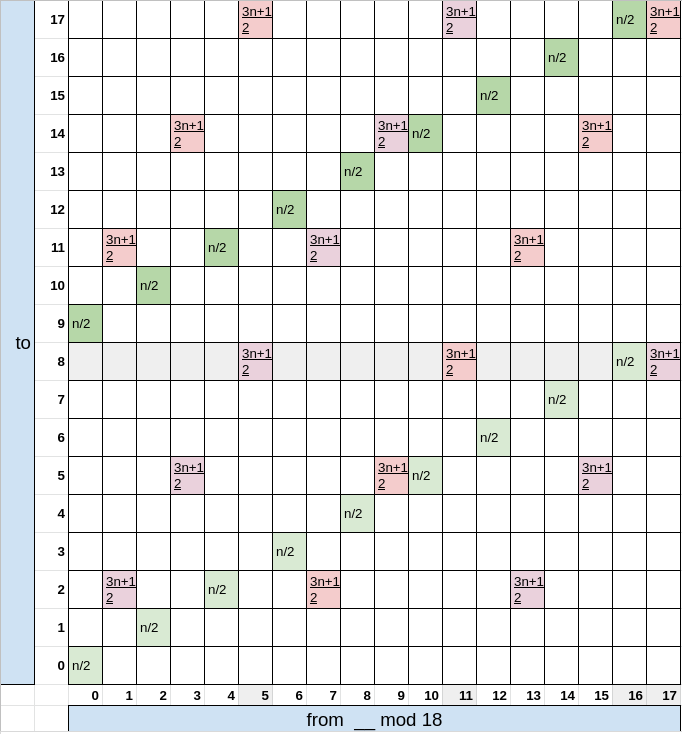

## The Proof

Per $[Alves, Graça]$ if there is a disconnected cycle in the Collatz numbers, then these numbers would not be in the lattice which starts from 1.  However, any number missing from the Collatz numbers has a cascading effect of numbers that also cannot be in the lattice that are not in the cycle.

Alves, Graça et al showed that if there is a cycle, it would start with a $8\,mod\,18$ number.

A $8\,mod\,18$ number could be tied into the lattice via one of four possible prior number relationships:
 - $f_{3n+1/2}( 5\,mod\,18 ) \mapsto 8\,mod\,18 \  or \  17\,mod\,18 $
 - $f_{3n+1/2}( 11\,mod\,18 ) \mapsto 8\,mod\,18 \  or \  17\,mod\,18 $
 - $f_{3n+1/2}( 17\,mod\,18 ) \mapsto 8\,mod\,18 \  or \  17\,mod\,18 $
 - $f_{n/2}( 16\,mod\,18 ) \mapsto 8\,mod\,18 $
 
The even number $( 8\,mod\,18 )$ will always exist and would always be in the immediately prior generation.  We also find that the even number must be preceded by another $14\,mod\,18$ even number in the preceding generation.  So this is at least 2 numbers based on the cycle starting vertex that cannot be in the lattice because if they were, then the cycle starting vertex would be in the lattice.

So we have a contradiction because the existence of the cycle, not only eliminates the numbers in the cycle from the lattice but also imposes contradictory requirements on numbers that are not part of the cycle but which would normally be found in generations BEFORE the cycle starts.

## Alibi

The last time I wrote a formal proof was 1985.  I have been intermittently visiting this problem for decades, but I accept that I may have missed points of rigor. I am certain that the mapping between the lattice and the Collatz chains is correct, but I am not certain that I have covered every point neccessary for this to be a complete proof.  The fact is that Alves, Graça et al did the heavy lift, while I believe I innovated on how to force the $8\,mod\,18$ numbers into the solution.

# References
$[Alves, Graça]$ J.F. Alves, M.M. Graça, M.E. Sousa Dias, J. Sousa Ramos "A linear algebra approach to the conjecture of Collatz" Linear Algebra and its Applications 394 (2005) 277-289